In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import copy
import tensorflow as tf
from sklearn.linear_model import LinearRegression


2024-03-25 14:28:05.746469: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 14:28:05.752914: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 14:28:05.824751: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 14:28:07.564432: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
dataset_cols=['bike_count','hour','temp','humidity','wind','visibility','dew_pt_temp','radiation','rain','snow','functional']
df=pd.read_csv('SeoulBikeData.csv').drop(['Date','Seasons','Holiday'], axis=1)

In [4]:
df.columns=dataset_cols
df['functional']=(df['functional']=='Yes').astype(int)
df=df[df['hour']==12]
df=df.drop(['hour'],axis=1)

In [5]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


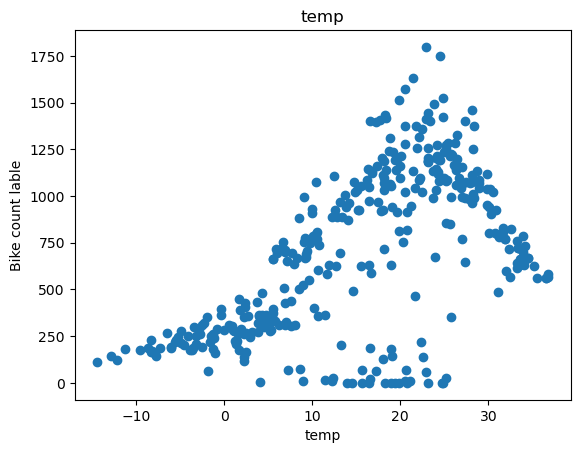

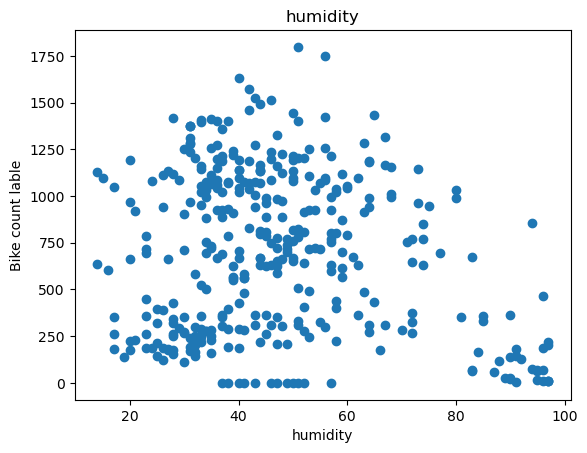

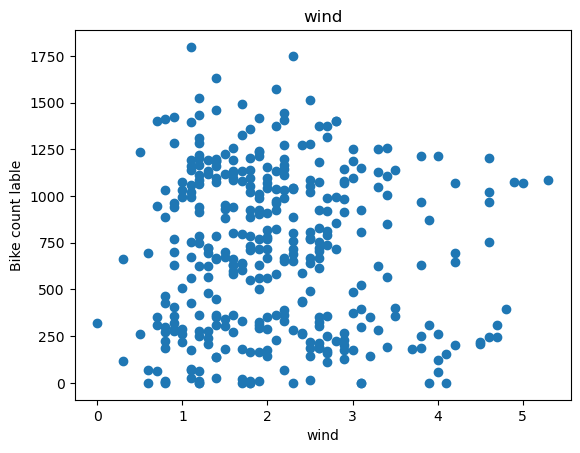

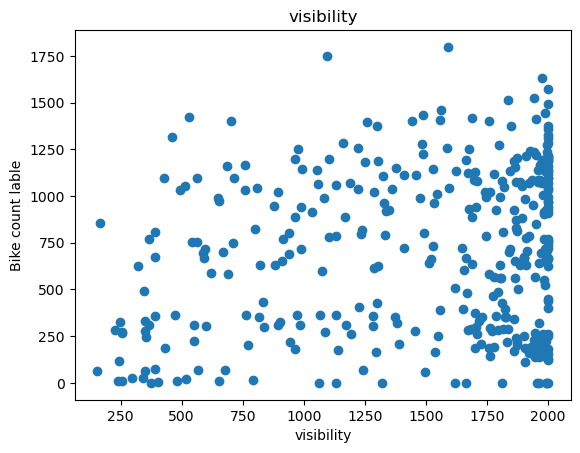

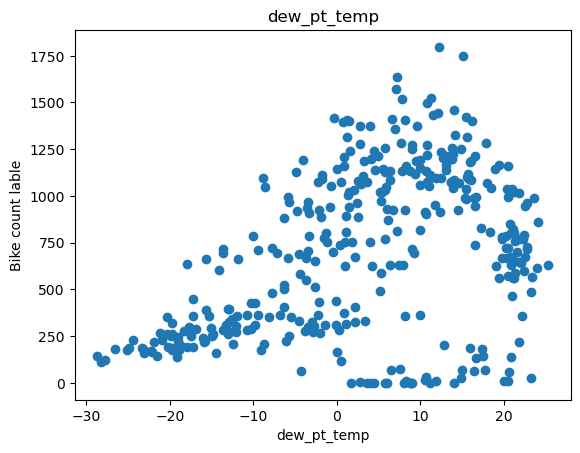

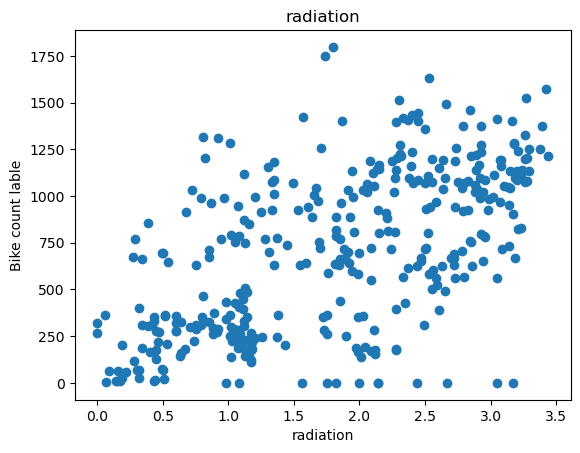

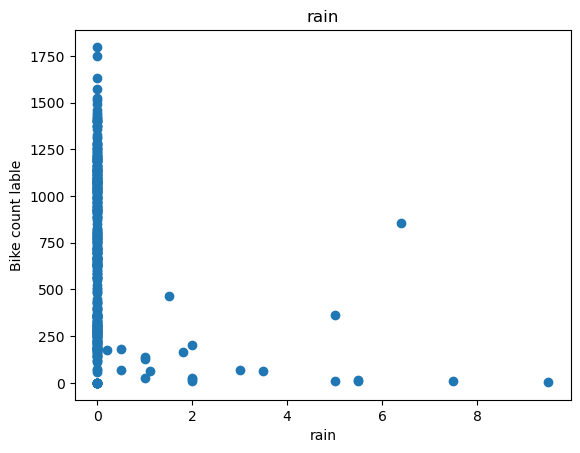

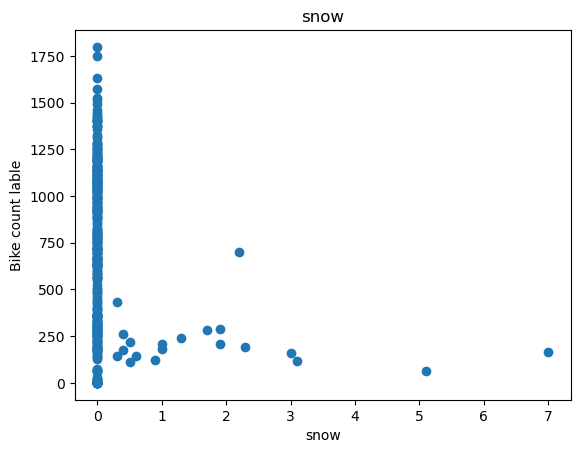

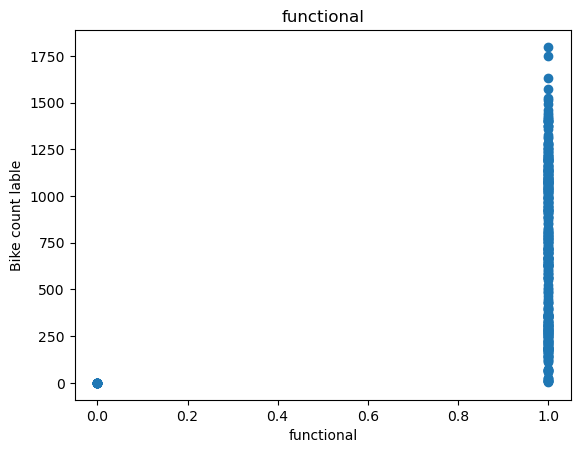

In [6]:
for label in df.columns[1:]:
    plt.scatter(df[label],df['bike_count'])
    plt.title(label)
    plt.ylabel('Bike count lable')
    plt.xlabel(label)
    plt.show()

In [7]:
df=df.drop(['wind','visibility','functional'], axis=1)

In [8]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [9]:
#training,testing,validation data
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [28]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe=copy.deepcopy(dataframe)
    if x_labels is None:
        X=dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels)==1:
            X=dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X=dataframe[x_labels].values
    
    y=dataframe[y_label].values.reshape(-1,1)
    data=np.hstack((X,y))

    return data,X,y


            

In [29]:
_,X_train_temp,y_train_temp=get_xy(train,'bike_count',x_labels=['temp'])
_,X_valid_temp,y_valid_temp=get_xy(valid,'bike_count',x_labels=['temp'])
_,X_test_temp,y_test_temp=get_xy(test,'bike_count',x_labels=['temp'])

In [30]:
temp_reg=LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [31]:
temp_reg.score(X_test_temp, y_test_temp)

0.2823973272856558

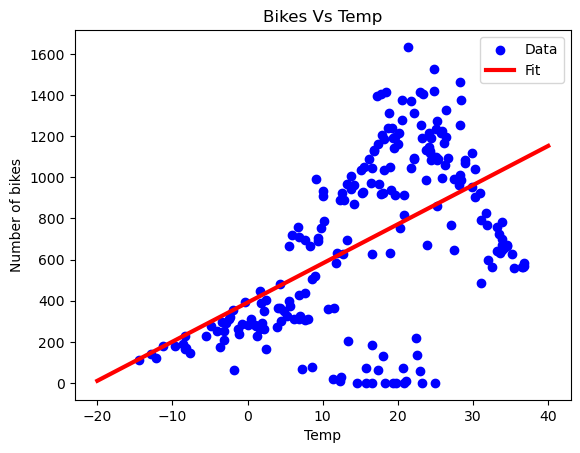

In [25]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x=tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("Bikes Vs Temp")
plt.ylabel('Number of bikes')
plt.xlabel('Temp')
plt.show()


In [32]:
#multiple linear regression
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
_, X_train_all,y_train_all=get_xy(train,'bike_count',x_labels=df.columns[1:])
_, X_valid_all,y_valid_all=get_xy(valid,'bike_count',x_labels=df.columns[1:])
_, X_test_all,y_test_all=get_xy(test,'bike_count',x_labels=df.columns[1:])

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [41]:
all_reg=LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [42]:
all_reg.score(X_test_all, y_test_all)

0.4332590522987976

In [50]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [51]:
#regression with neural net
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/home/psalmon/.local/lib/python3.11/site-packages/keras/src/layers/preprocessing/normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
temp_nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [54]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [55]:
history=temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=3,
    epochs=1000,
    validation_data=(X_valid_temp, y_valid_temp)

)


Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

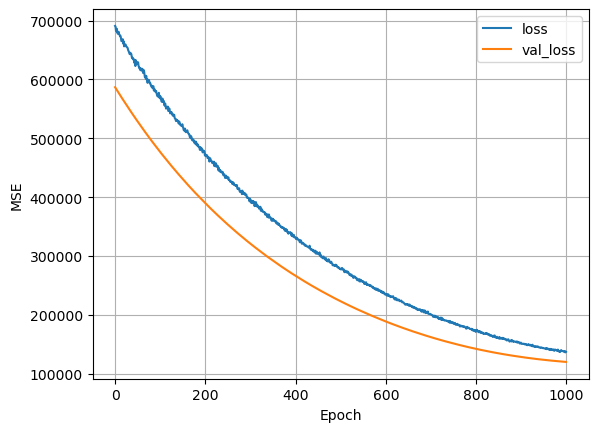

In [56]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


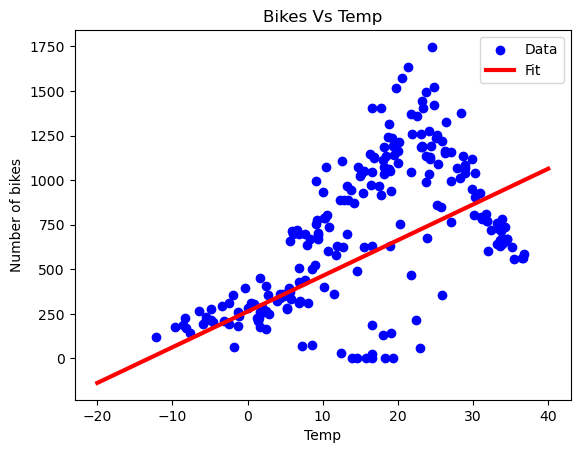

In [57]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x=tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("Bikes Vs Temp")
plt.ylabel('Number of bikes')
plt.xlabel('Temp')
plt.show()


In [66]:
#neural Network
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

/home/psalmon/.local/lib/python3.11/site-packages/keras/src/layers/preprocessing/normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
history=nn_model.fit(
    X_train_temp,y_train_temp,
    validation_data=(X_valid_temp,y_valid_temp),
    verbose=0,epochs=100
)

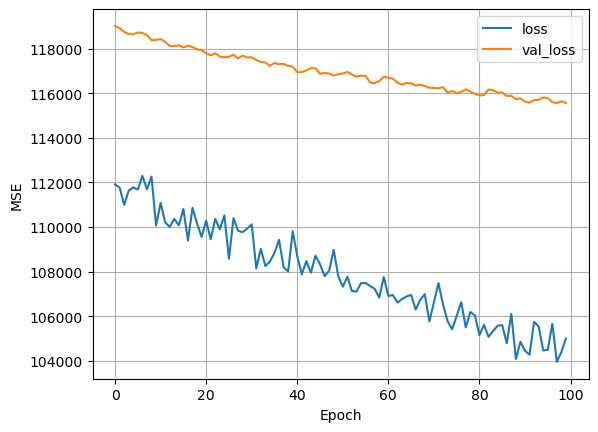

In [74]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


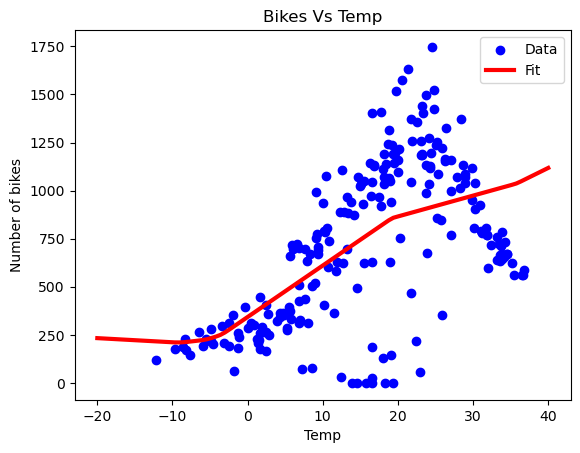

In [75]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x=tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("Bikes Vs Temp")
plt.ylabel('Number of bikes')
plt.xlabel('Temp')
plt.show()
